## Rod Pump Failure: K-Nearest Neighbors Model, Iteration 2
**Improvements:**
* Added grid search for `n_neighbors` hyperparameter
* Added cross validation in model training
* Added data balancing function eliminate binning of output values
* Tested classifier on entire dataset to ensure successful implimentation

In [1]:
# General imports
from floridaman import data_cleaning
import pandas as pd
import numpy as np

In [2]:
# Load raw data
raw_data = data_cleaning.load('null_transformed')

In [8]:
# Model-specific imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

Scoring method: roc_auc_ovo
Classifier training score: 0.6443688362919132
Classifier testing score: 0.7026699309041776
Best parameters: {'n_neighbors': 14}


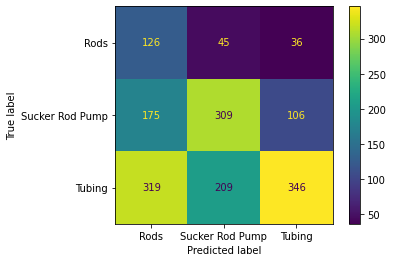

In [47]:
# Generate candidate dataset by removing nulls from raw_data using parameters
# Drop columns with more than 40% null values
# Drop rows with between 40% and 40% null values
# Impute rows with missing data below 40% null values using 5 n_neighbors

candidate_data = data_cleaning.generate_candidate_dataset(raw_data, .40, .40, 5)

# Create training dataset by balancing the number of occurances of each observed failuretype

train_data = data_cleaning.balance(candidate_data)

# Split training data into X and y

X_train = np.array(train_data[data_cleaning.features(train_data)])
y_train = np.array(train_data['FAILURETYPE'])

# Split all data into X and y for testing

X_test = np.array(candidate_data[data_cleaning.features(candidate_data)])
y_test = np.array(candidate_data['FAILURETYPE'])

# Create KNN classifier and parameter grid to test 1-30 n_neighbors

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 30)}

# Create grid search object with specified parameter grid
# using roc_auc_ovo scoring and cross validation with 8 folds

clf = GridSearchCV(knn, param_grid, scoring='roc_auc_ovo', cv=8)

# Fit classifier to X_train and y_train

clf.fit(X_train, y_train)

# Print some results from training and testing data

print("Scoring method: roc_auc_ovo")
print("Classifier training score: " + str(clf.best_score_)) # prints best roc score from training set
print("Classifier testing score: " + str(clf.score(X_test, y_test))) # prints best roc score using all data as test
print("Best parameters: " + str(clf.best_params_)) # prints ideal values for parameters

# Plot the confusion matrix

conf_mat = plot_confusion_matrix(clf, X_test, y_test)